In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
import numpy as np
import scipy.optimize
import scipy.spatial
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
H = 100

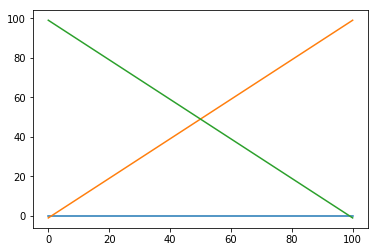

In [12]:
x = np.arange(0, H+1, 1)
plt.plot(x, x * 0)
plt.plot(x, x-1)
plt.plot(x, H-x-1)

In [25]:
border_points = np.array([
    [2,1],
    [H/2,H/2-1],
    [H-2,1],
    [2,1]
])

In [127]:
def show_parts(*parts, **kwargs):
    plt.figure(figsize=(14,8))
    plt.grid(True)
    plt.axis('equal')
    for part in parts:
        plt.plot(part[:,0],part[:,1], '.-', c='r')

In [128]:
def split_border(Nodes,N,closed=False):
    points_x = np.array([])
    points_y = np.array([])
    for i in range(Nodes.shape[0]-2):
        points_x = np.append(points_x, np.linspace(Nodes[i,0],Nodes[i+1,0],N[i])[:-1])
        points_y = np.append(points_y,np.linspace(Nodes[i,1],Nodes[i+1,1],N[i])[:-1])
        
    if not closed:   
        points_x = np.append(points_x,np.linspace(Nodes[-2,0],Nodes[-1,0],N[-1]))
        points_y = np.append(points_y,np.linspace(Nodes[-2,1],Nodes[-1,1],N[-1]))
    if closed:
        points_x = np.append(points_x,np.linspace(Nodes[-2,0],Nodes[-1,0],N[-1])[:-1])
        points_y = np.append(points_y,np.linspace(Nodes[-2,1],Nodes[-1,1],N[-1])[:-1])
    
    
    return np.hstack((points_x.reshape(-1,1),points_y.reshape(-1,1)) )

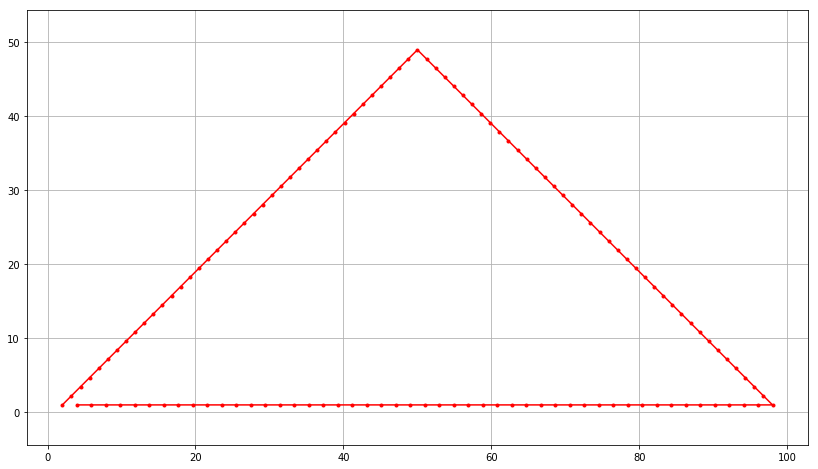

In [129]:
RL_tri = split_border(border_points, [40,40,50], closed=True)

show_parts(RL_tri)

In [137]:
delta = 1.5

In [148]:
L,R = np.meshgrid(np.linspace(2+delta, H-2-delta, 41), 
                  np.linspace(H/2-1-delta,1+delta, 20))

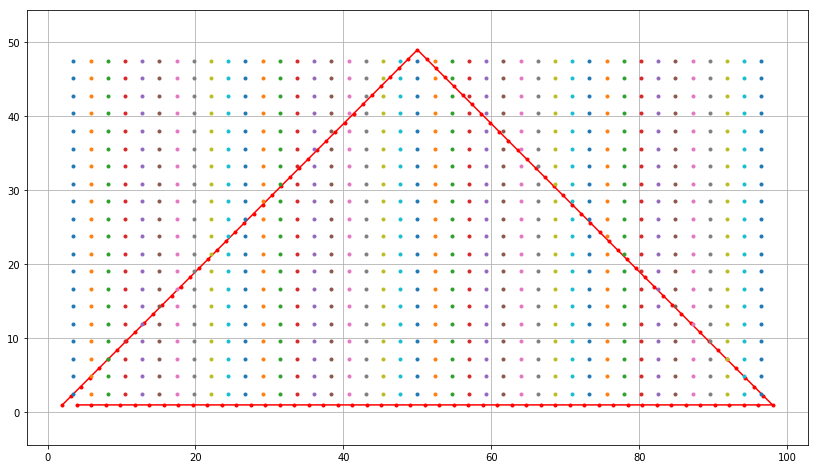

In [149]:
show_parts(RL_tri)
plt.plot(L,R,'.');

In [150]:
inner = np.vstack((L.ravel(),R.ravel())).T
inner.shape

(820, 2)

In [151]:
mask1 = inner[:,1] < inner[:,0]-1-delta/2
mask2 = inner[:,1] < -inner[:,0]+H-1-delta/2

In [152]:
inner = inner[mask1 & mask2]

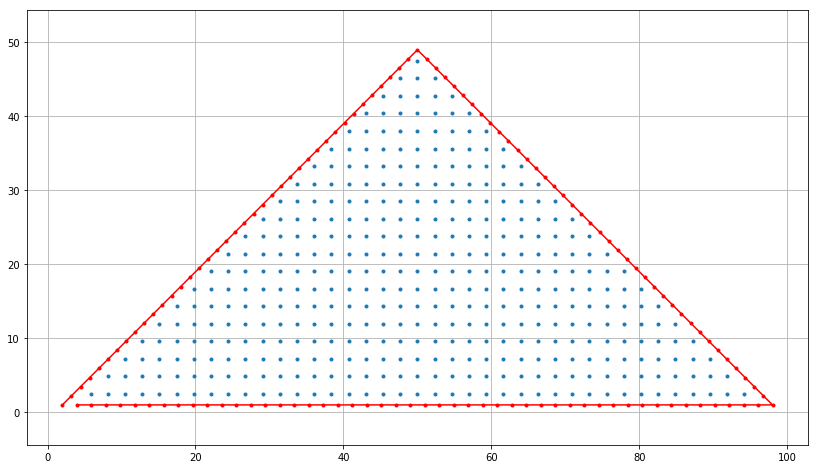

In [153]:
show_parts(RL_tri)
plt.plot(inner[:,0], inner[:,1], '.');

# Example

In [241]:
def model(H, R, L, s):
    corners = np.array([
        [0,0], [0,H], 
        [H,H], [H,0],
        [0,0]
    ])
    
    around = split_border(corners, s[:-1], closed=True)
    
    alpha = np.radians(np.linspace(0, 360, s[-1]))
    x = R*np.cos(alpha) + L
    y = R*np.sin(alpha) + H/2
    inside = np.hstack((x.reshape(-1, 1),y.reshape(-1, 1)))[:-1]
    
    X,Y = np.meshgrid(np.linspace(delta,H-delta,24), 
                  np.linspace(0+delta,H-delta, 24))

    inner = np.vstack((X.ravel(),Y.ravel())).T
    mask = (inner[:,0] - L)**2 + (inner[:,1] - H/2)**2 > (R+delta/2)**2

    inner = inner[mask]
    
    return around, inside, inner

In [405]:
def triangulation(data):
    Nodes = np.vstack(data)
    trng = scipy.spatial.Delaunay(Nodes)
    trng_vertices = Nodes[trng.simplices]
    trng_x_verices = trng_vertices[:,:,0]
    trng_y_verices = trng_vertices[:,:,1]
    trng_x_mean = np.mean(trng_x_verices,axis=1)
    trng_y_mean = np.mean(trng_y_verices,axis=1)
    trng_centers = np.hstack((trng_x_mean.reshape(-1,1),trng_y_mean.reshape(-1,1)))
    delta2 = 0.01
    mask_tri = np.sum((trng_centers - np.array([L, H/2]))**2, axis=1) > (R-delta2)**2
    simplices = trng.simplices.copy()
    simplices = simplices[mask_tri]
    
    return Nodes, simplices

In [421]:
L = H/2
R = H/20

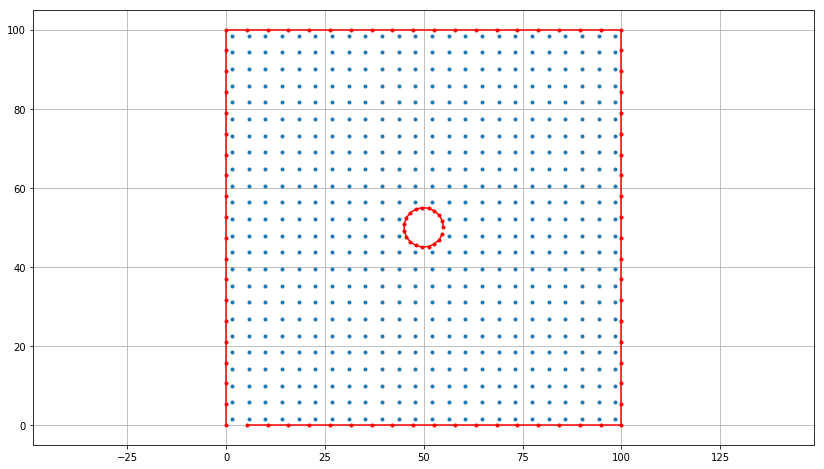

In [424]:
model_data = model(H, R, L, [20, 20, 20, 20, 20])

show_parts(model_data[0], model_data[1])
plt.plot(model_data[2][:,0], model_data[2][:,1],'.');

(-5.0, 105.0, -5.0, 105.0)

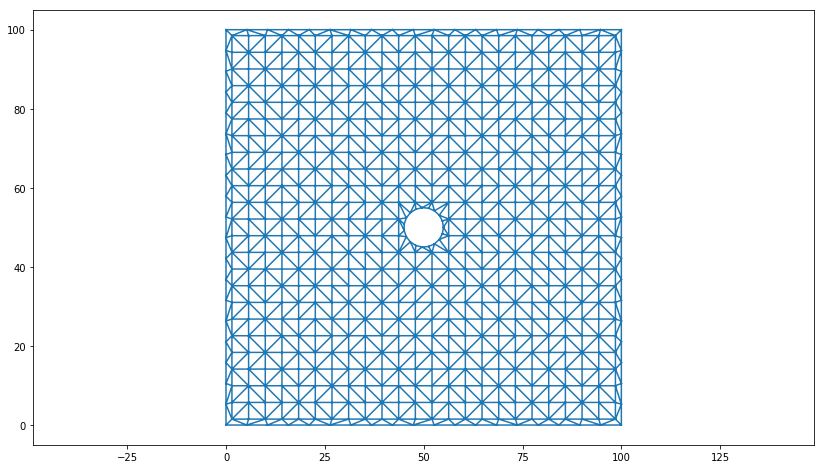

In [425]:
Nodes, simplices = triangulation(model_data)

plt.figure(figsize=(14,8))
plt.triplot(Nodes[:,0],Nodes[:,1],simplices)
plt.axis('equal')